In [ ]:
# venv: uacademia >>> 20250528

![](https://www.frontiersin.org/files/Articles/1134141/fspas-10-1134141-HTML-r1/image_m/fspas-10-1134141-g010.jpg)

# Análisis de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import edaplus as eda
import numpy as np

/Users/lgarrido/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df_bangalore = pd.read_csv("temp/Bangalore_1990_2022_BangaloreCity.csv")
df_bangalore["cdad"] = "Bangalore"
#df_bangalore.sample(5)
df_chennai = pd.read_csv("temp/Chennai_1990_2022_Madras.csv")
df_chennai["cdad"] = "Chennai"
#df_chennai.sample(5)
df_delhi = pd.read_csv("temp/Delhi_NCR_1990_2022_Safdarjung.csv")
df_delhi["cdad"] = "Delhi"
#df_delhi.sample(5)
df_lucknow = pd.read_csv("temp/Lucknow_1990_2022.csv")
df_lucknow["cdad"] = "Lucknow"
#df_rajasthan.sample(5)

## Análisis de Correlación

Es útil cuando se quiere entender la relación entre variables (columnas).

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*ZVA5aSsUeAabf_S9NkxKiQ.png)

Por ejemplo:
Los ingresos se asignados al eje **X** y los beneficios al eje **Y**, y podemos ver cómo están correlacionados.
Si se dibuja una línea de tendencia va directamente hacia arriba desde la parte inferior izquierda a la parte superior derecha, pendiente positiva.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*hWJ7qYYk9kdOGGXdc3U8Iw.png)

Esto indica que las dos variables están altamente correlacionadas y se le conoce como, **correlación positiva**.

---

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*aiFenzKJ2_uE46QMDx2NQA.png)

Esta vez, la línea de tendencia está bajando desde el lado superior izquierdo hasta la parte inferior derecha, pendiente negativa.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XrraxeUKF0SrtYPmtmg8IQ.png)

También se habla de altamente correlacionados, pero de **correlación negativa**.

---

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*DEwJYWnL3yhmDtqAkldSSQ.png)

Los puntos están por todas partes y parece que no hay una tendencia clara. Esto indica que no hay correlación entre las variables y son independientes una de la otra.

---

En lugar de examinar la correlación uno por uno, normalmente es desable ver qué variables del conjunto de datos se correlacionan entre sí.
Ahora, si se visualiza estos datos para ver la tendencia de las temperaturas a lo largo de los años entre las ciudades, se puede ver que algunas ciudades comparten tendencias más similares que las otras, lo que significa que están más correlacionadas.

In [35]:
# Crea una lista con todos los DataFrames que quieres combinar
lista_dfs = [df_bangalore, df_chennai, df_delhi, df_lucknow]

# Usa pd.concat para unirlos
df = pd.concat(lista_dfs, ignore_index=True)
#df.sample(5)

In [37]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')
df = df[(df['time'] >= "2014-01-01") & (df['time'] < "2017-01-01")]
#df.sample(5)

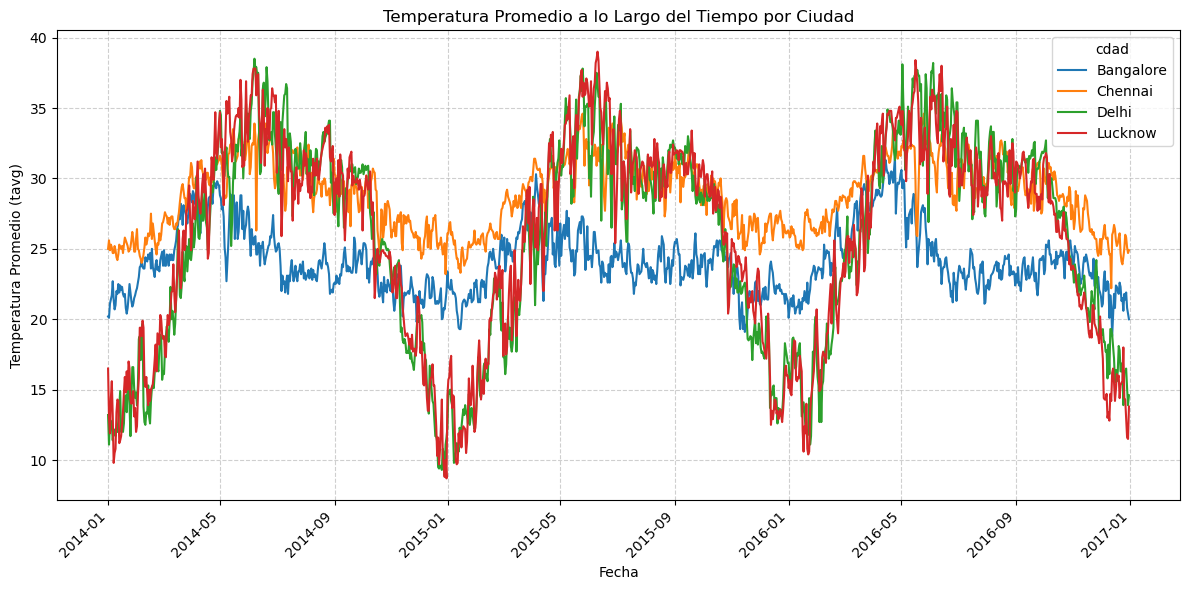

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='tavg', data=df, hue='cdad')
plt.xticks(rotation=45, ha='right')

plt.title('Temperatura Promedio a lo Largo del Tiempo por Ciudad')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio (tavg)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() 
plt.show()

Pero, nuestros ojos no son tan buenos para reconocer patrones, especialmente cuando hay muchos puntos de datos. En lugar de confiar en nuestros ojos, se puede calcular la correlación entre todas las variables juntas.

In [42]:
df_pivot = df.pivot_table(
    index='time',      # La columna que representa el tiempo (fechas/días)
    columns='cdad',  # La columna que representa las categorías (estaciones/ciudades)
    values='tavg'      # La medida numérica que quieres comparar (temperatura)
    #aggfunc='mean'      # Si hay múltiples lecturas por día/estación, usa la media
)
corr_pivot = df_pivot.corr()

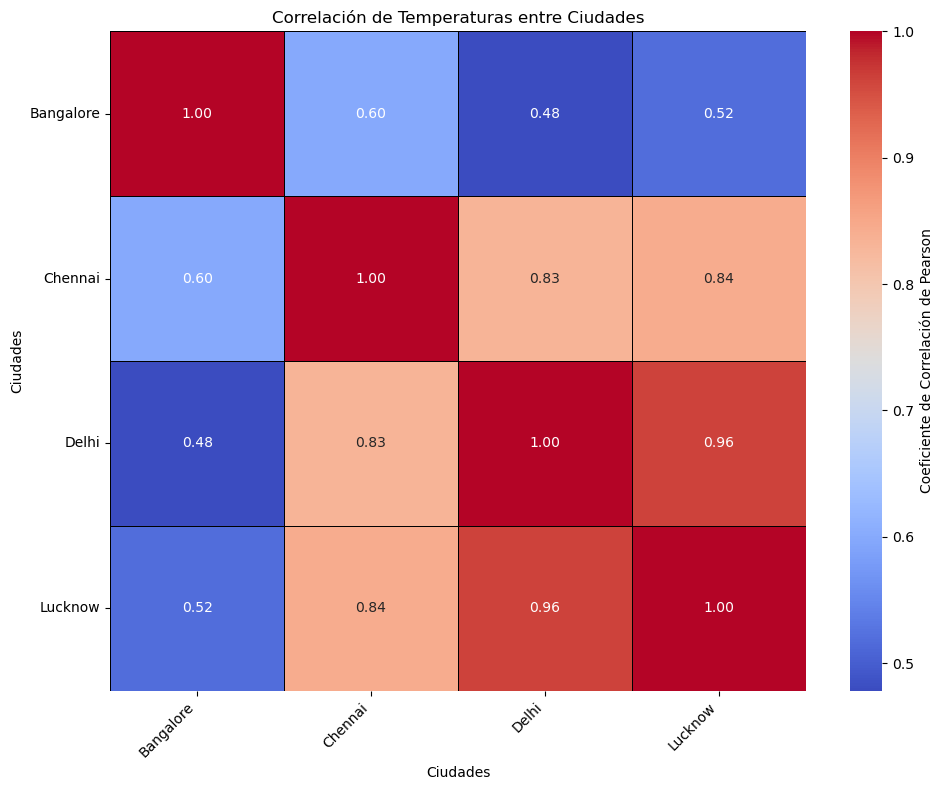

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pivot,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=.5,
            linecolor='black',
            cbar_kws={'label': 'Coeficiente de Correlación de Pearson'})
plt.title('Correlación de Temperaturas entre Ciudades')
plt.xlabel('Ciudades')
plt.ylabel('Ciudades')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Cuanto más oscuro es el color rojo, mayor es la correlación. Y, se puede ver que Lucknow y Delhi están altamente y positivamente correlacionados con 0.96 punto.

Los valores de correlación se encuentran entre -1 y 1.

- -1 indica la correlación negativa completa que significa que cuando uno sube otro baja el mismo grado.

- 1 indica la correlación positiva completa que significa que cuando uno sube otro sube sube en el mismo grado.

In [57]:
df_filtrado = df[(df['cdad'] == "Lucknow") | (df['cdad'] == "Delhi")]

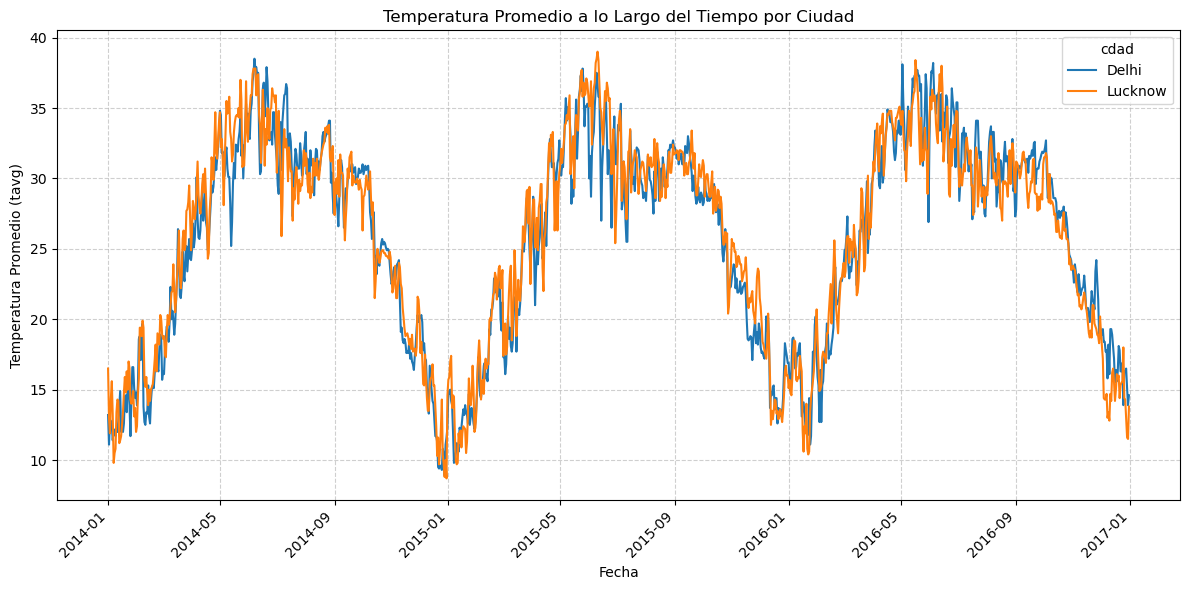

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='tavg', data=df_filtrado, hue='cdad')
plt.xticks(rotation=45, ha='right')

plt.title('Temperatura Promedio a lo Largo del Tiempo por Ciudad')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio (tavg)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() 
plt.show()

Se puede volver al gráfico original y ver cómo Rajasthan y Bangalore están correlacionados.

## Correlaciones entre columnas (o Variables)

Ahora, cuando se miran estos mismos datos meteorológicos, hay más variables que solo la temperatura (tavg).


In [62]:
df.sample(5)

,time,tavg,tmin,tmax,prcp,cdad
21672,2016-10-09,30.2,27.0,36.8,NaN,Chennai
21189,2015-06-14,31.6,25.8,38.1,NaN,Chennai
21138,2015-04-24,29.3,NaN,37.3,NaN,Chennai
9680,2016-07-03,23.6,20.2,28.8,0.0,Bangalore
9698,2016-07-21,21.9,19.6,27.7,23.1,Bangalore


Si queremos saber qué variables están más correlacionadas.

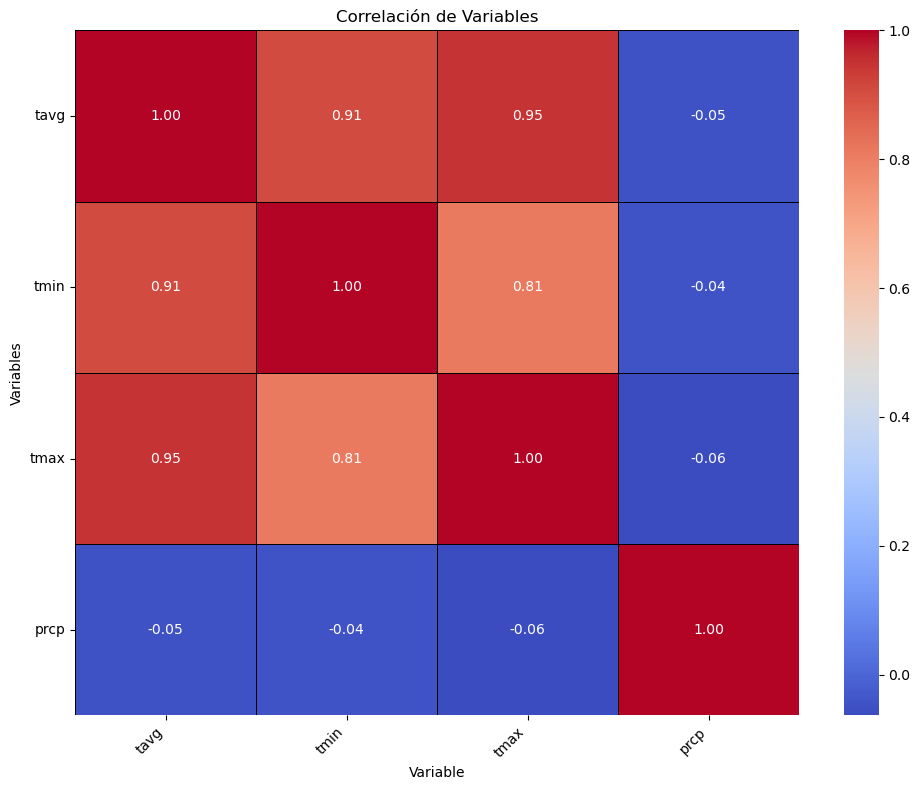

In [67]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=.5,
            linecolor='black')
            #cbar_kws={'label': 'Coeficiente de Correlación de Pearson'})
plt.title('Correlación de Variables')
plt.xlabel('Variable')
plt.ylabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Cuanto más oscuro el azul, más altas se correlacionan negativamente. En este ejemplo no existe una correlacion negativa entre las variables

Como se ha visto, la correlación es una gran herramienta si se quiere entender la relación entre las variables (columnas).

Entender la correlación entre las variables se vuelve aún más importante cuando se desea construir modelos predictivos con algoritmos de **Machine Learning**. Por ejemplo, cuando se utiliza el **Análisis de Importancia de Variables** o el **Análisis de Regresión** para comprender qué variables tienen más influencia en el resultado de la predicción y cómo, no queremos incluir variables altamente correlacionadas juntas como variables predictoras, porque distribuyen el poder de influencia entre ellas y no podemos medir o comparar los verdaderos efectos de las variables

## Explicación con mayor detalle (por qué es importante y qué significa):

Imagina que estás construyendo un modelo para predecir el precio de una casa. Tienes muchas variables (características) como:

- Tamaño de la casa (en metros cuadrados)
- Número de habitaciones
- Número de baños
- Antigüedad de la casa
- Distancia al centro de la ciudad
- Distancia a la escuela más cercana

Ahora, pensemos en la **correlación**:

- Es muy probable que el "Tamaño de la casa" y el "Número de habitaciones" estén **altamente correlacionados**. Generalmente, a mayor tamaño de la casa, más habitaciones tendrá. Si una aumenta, la otra también tiende a aumentar de manera predecible.
- De la misma manera, la "Distancia al centro de la ciudad" y la "Distancia a la escuela más cercana" también podrían estar **altamente correlacionadas** si las escuelas tienden a estar ubicadas en relación con el centro.

### ¿Por qué no se quiere incluir variables altamente correlacionadas juntas en un modelo predictivo?

Los problemas que esto causa, especialmente en el contexto de **Machine Learning** y **Análisis de Regresión**:

1. Redundancia de Información (y "Poder de Influencia" distribuido):
    - Si tienes dos variables que se mueven casi al unísono (como el tamaño de la casa y el número de habitaciones), esencialmente están proporcionando información muy similar al modelo.
    - Cuando el modelo intenta aprender qué tan importante es cada variable para la predicción (`Variable Importance Analysis`) o cuál es su coeficiente de regresión (`Regression Analysis`), ese "poder" o "influencia" sobre el precio de la casa se "distribuye" entre estas dos variables redundantes.
    - Es decir, el modelo no sabe si atribuir la influencia al "Tamaño de la casa" o al "Número de habitaciones" porque ambas le están diciendo casi lo mismo. Esto hace que sea difícil para el modelo **determinar cuál es el verdadero efecto independiente de cada una**.
     

 
2. Dificultad para Medir y Comparar los Verdaderos Efectos (true effects):
    - En un análisis de regresión, por ejemplo, los coeficientes de las variables te dicen cuánto cambia el precio de la casa por cada unidad que aumenta la variable (manteniendo todo lo demás constante).
    - Pero si "Tamaño de la casa" y "Número de habitaciones" están altamente correlacionadas, es casi imposible para el modelo "mantener una constante" mientras la otra cambia. Se mueven juntas.
    - Esto lleva a coeficientes de regresión inestables o que no reflejan la verdadera contribución individual de cada variable. Parece que ambas tienen poca influencia, cuando en realidad, juntas, tienen mucha.

3. Problema de Multicolinealidad: Este es el término técnico para el problema de tener variables predictoras altamente correlacionadas.
    - Afecta la **interpretación** del modelo: hace que sea muy difícil entender la contribución única de cada variable.
    - Afecta la **estabilidad** de los coeficientes: pequeños cambios en los datos pueden llevar a grandes cambios en los coeficientes del modelo.
    - Puede afectar el **rendimiento** del modelo, especialmente en modelos lineales o basados en coeficientes. Aunque algunos modelos (como los basados en árboles) son menos sensibles a la multicolinealidad, sigue siendo una buena práctica abordarla.

### ¿Qué se hace al respecto?

Cuando se detectan variables altamente correlacionadas durante el Análisis Exploratorio de Datos (EDA):

- **Eliminar una de ellas**: Si dos variables están demasiado correlacionadas (ej. correlación > 0.9 o < -0.9), a menudo se elige una para eliminarla del conjunto de variables predictoras. La decisión de cuál eliminar puede basarse en la interpretabilidad, la calidad de los datos, o la importancia inicial.

- **Combinar variables**: Crear una nueva variable que sea una combinación o una transformación de las variables correlacionadas (ej. un índice de tamaño que combine varias medidas).

- **Análisis de Componentes Principales (PCA)**: Una técnica que puede transformar un conjunto de variables correlacionadas en un conjunto más pequeño de variables no correlacionadas (componentes principales), conservando la mayor parte de la varianza.

En resumen, **identificar y gestionar las variables altamente correlacionadas es un paso crítico en la preparación de datos para Machine Learning** porque mejora la interpretabilidad de los modelos y, en muchos casos, su estabilidad y rendimiento predictivo.